# Урок 2. Обзор основных алгоритмов машинного обучения, используемых в соревнованиях

В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


В домашнем задании, будем обучать разные алгоритмы машинного обучения. Для этого, нужно предварительно зафиксировать схему валидации решения (можете выбрать любую, которую знаете). Выбранную схему валидации нужно использовать во всех задачах этого домашнего задания. Метрика качества - ROC AUC, целевая переменная - isFraud.

Ссылка на данные - https://drive.google.com/file/d/1gMEVl47pIoV1-AseB9doQ6DZNJrY3NkW/view?usp=sharing


**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [4]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import scipy.stats as st

Расмотрим, для начала, что из себяпредставляет датасет.

In [5]:
# features_to_score = train_df.drop(["ID_code", "target"], axis=1).columns.tolist()
# psi = PSI(threshold=0.01)

In [6]:
train_df = pd.read_csv('./assignment2_data/assignment_2_train.csv')
test_df = pd.read_csv('./assignment2_data/assignment_2_test.csv')

In [7]:
print("train.shape = {} rows, {} cols".format(*train_df.shape))
print("test.shape = {} rows, {} cols".format(*test_df.shape))

train.shape = 180000 rows, 394 cols
test.shape = 100001 rows, 394 cols


In [8]:
test_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3287000,1,7415038,226.00,W,12473,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3287001,0,7415054,3072.00,W,15651,417.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3287002,0,7415081,319.95,W,13844,583.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test_df['isFraud'].value_counts()

0    96197
1     3804
Name: isFraud, dtype: int64

In [10]:
train_df.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
train_df['isFraud'].value_counts()

0    174859
1      5141
Name: isFraud, dtype: int64

In [12]:
train_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,1.800000e+05,180000.000000,1.800000e+05,180000.000000,180000.000000,177389.000000,179997.000000,179047.000000,160567.000000,160567.000000,...,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000,47996.000000
mean,3.077000e+06,0.028561,1.909818e+06,129.514237,9860.225806,368.326897,153.410374,200.363089,291.160444,86.559903,...,0.137074,74.962242,99.220468,85.778161,8.326725,18.404676,12.437524,26.798593,32.005349,28.492421
std,5.196167e+04,0.166570,1.039029e+06,206.515032,4910.778205,158.952840,11.529483,40.585532,102.250385,3.958070,...,0.642444,545.161980,668.223140,577.072150,84.616132,120.896921,99.305885,252.695682,284.870583,258.372941
min,2.987000e+06,0.000000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.032000e+06,0.000000,1.091681e+06,44.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.077000e+06,0.000000,1.884075e+06,75.000000,9633.000000,375.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.121999e+06,0.000000,2.693196e+06,125.000000,14182.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.166999e+06,1.000000,3.958317e+06,5278.950000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,15.000000,20750.000000,32250.000000,21250.000000,3100.000000,3350.000000,3250.000000,8250.000000,8250.000000,8250.000000


In [13]:
len(train_df)

180000

In [14]:
train_df.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              132004
V336              132004
V337              132004
V338              132004
V339              132004
Length: 394, dtype: int64

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром `booster = gbtree`. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [15]:
y_data = train_df['isFraud']
x_data = train_df.drop(['isFraud'],axis=1)

In [16]:
x_data

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,3166995,3958217,39.00,W,1877,310.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179996,3166996,3958237,59.95,W,10075,514.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179997,3166997,3958241,34.00,W,6053,122.0,150.0,mastercard,195.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179998,3166998,3958260,59.00,W,7726,555.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# TransactionAmt - сумма транзакции.
# TransactionDT - дата/время транзакции.

In [18]:
y_data

0         0
1         0
2         0
3         0
4         0
         ..
179995    0
179996    0
179997    0
179998    0
179999    0
Name: isFraud, Length: 180000, dtype: int64

In [19]:
# Получим список катероиальных и числовых признаков. 
categorical = []
numerical = []
for col, value in x_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)
    # numerical.remove('quality')

In [20]:
x_data[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
x_data['card6'].value_counts()

debit              122746
credit              57229
debit or credit        10
charge card             8
Name: card6, dtype: int64

In [22]:
x_data[['M1','M2']].value_counts()

M1  M2
T   T     55657
    F      6091
F   F         1
dtype: int64

In [23]:
x_data['P_emaildomain'].value_counts()# Всего 60 различных значений адреса.

gmail.com           67198
yahoo.com           28992
hotmail.com         15058
anonymous.com       13328
aol.com              8583
comcast.net          2916
icloud.com           1677
outlook.com          1484
msn.com              1423
att.net              1223
sbcglobal.net        1092
verizon.net           971
live.com              894
bellsouth.net         713
ymail.com             654
me.com                624
cox.net               570
yahoo.com.mx          522
charter.net           372
optonline.net         362
live.com.mx           254
mac.com               214
rocketmail.com        201
earthlink.net         173
mail.com              147
outlook.es            142
roadrunner.com        119
gmail                 115
juno.com              111
embarqmail.com        109
windstream.net         95
twc.com                86
hotmail.es             85
frontier.com           79
q.com                  68
hotmail.fr             68
netzero.com            65
web.de                 64
aim.com     

In [24]:
x_data['R_emaildomain'].value_counts()# Всего 60 различных значений адреса. 

gmail.com           24644
hotmail.com         10129
anonymous.com        9882
yahoo.com            5666
aol.com              2232
comcast.net          1185
outlook.com           824
icloud.com            605
yahoo.com.mx          520
msn.com               478
verizon.net           404
sbcglobal.net         374
live.com              339
cox.net               329
me.com                293
bellsouth.net         284
att.net               283
live.com.mx           254
outlook.es            141
ymail.com             132
mac.com               126
optonline.net         110
hotmail.es             84
charter.net            80
hotmail.fr             69
web.de                 62
prodigy.net.mx         62
mail.com               58
earthlink.net          51
embarqmail.com         46
frontier.com           40
juno.com               38
yahoo.fr               34
windstream.net         33
gmx.de                 32
roadrunner.com         31
rocketmail.com         30
cfl.rr.com             28
yahoo.de    

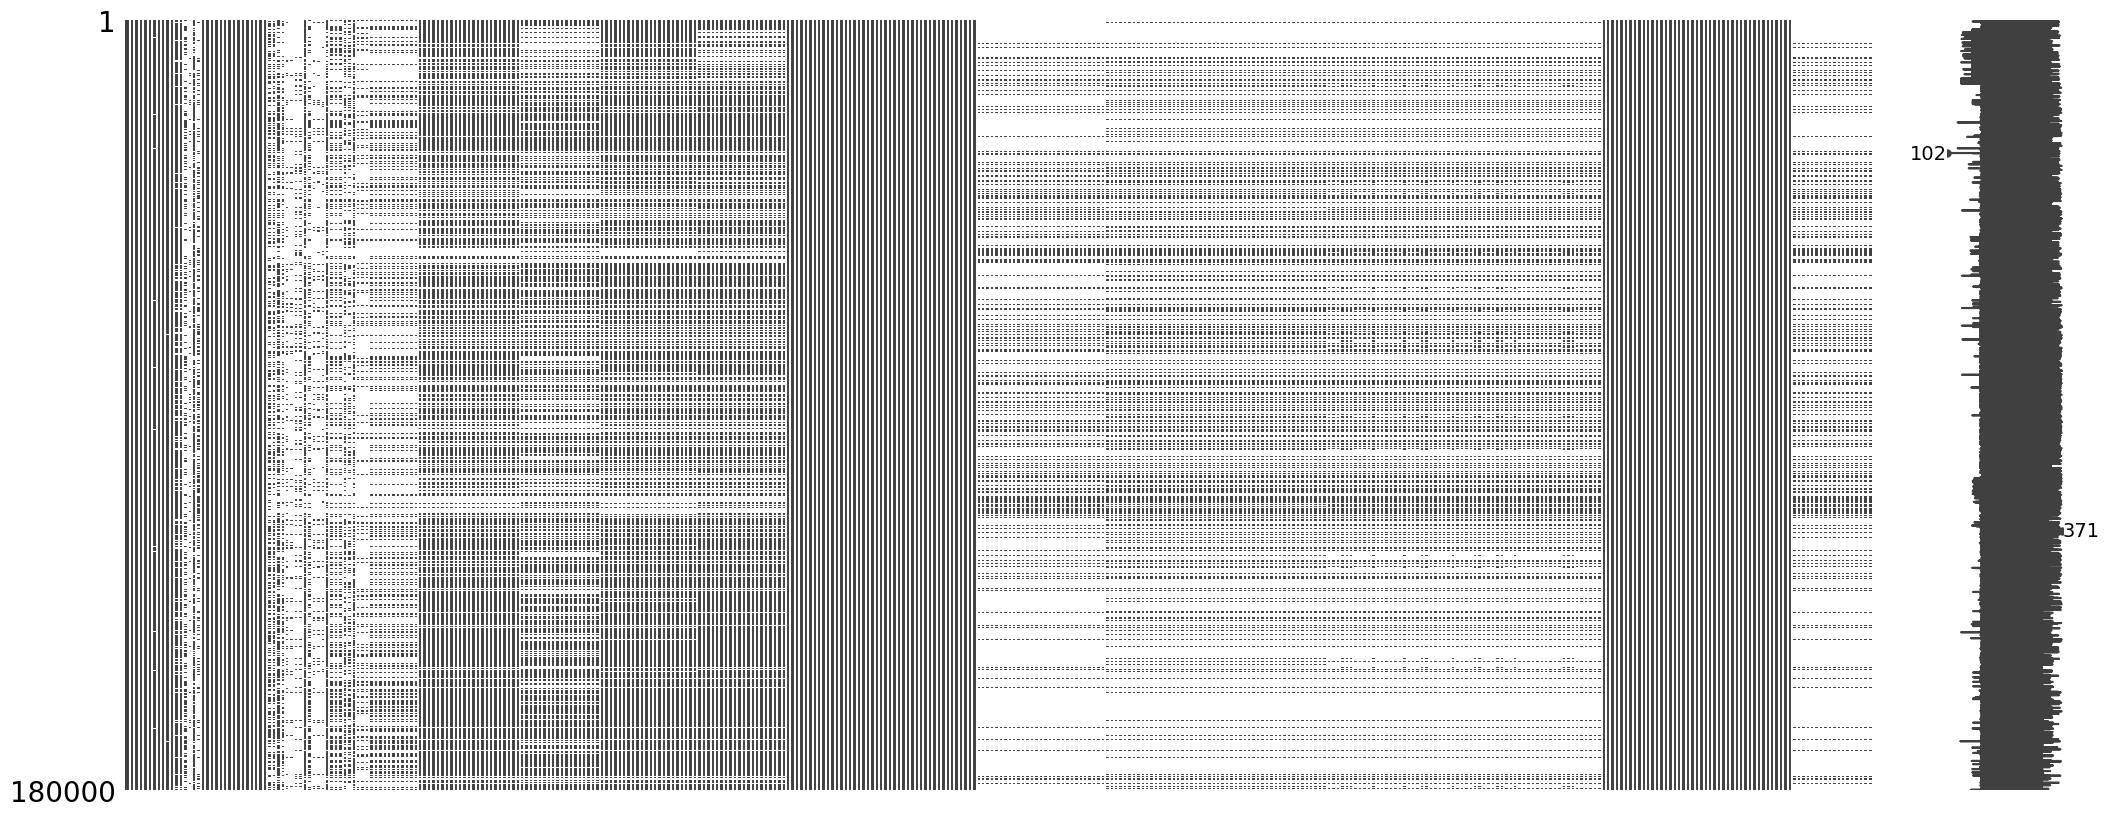

In [25]:
msno.matrix(train_df)
plt.show()

In [26]:
len(x_data['R_emaildomain'].value_counts())# Всего 60 различных значений адреса. 

60

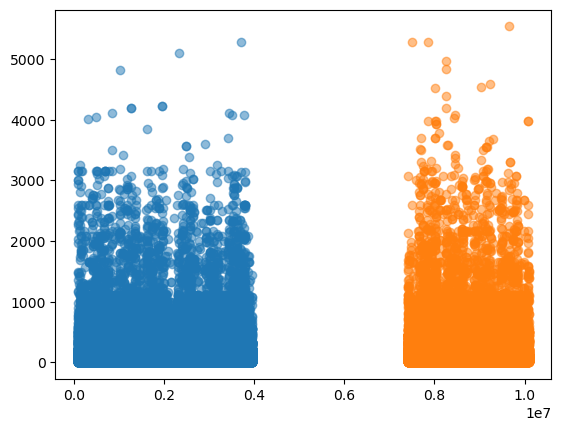

In [27]:
plt.scatter(train_df['TransactionDT'], train_df['TransactionAmt'], alpha=0.5)
plt.scatter(test_df['TransactionDT'], test_df['TransactionAmt'], alpha=0.5)
plt.show()

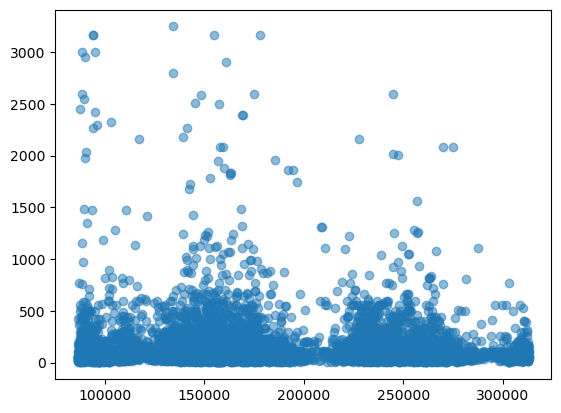

In [28]:
plt.scatter(train_df['TransactionDT'][:10000], train_df['TransactionAmt'][:10000], alpha=0.5)
plt.show()

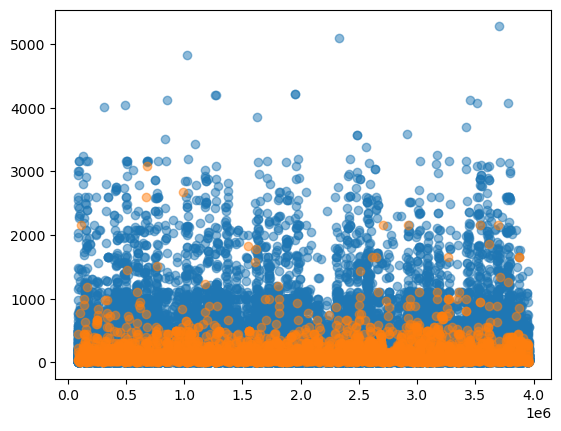

In [29]:
plt.scatter(train_df.loc[(train_df['isFraud']==0,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==0,'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[(train_df['isFraud']==1,'TransactionDT')],
            train_df.loc[(train_df['isFraud']==1,'TransactionAmt')], alpha=0.5)
plt.show()

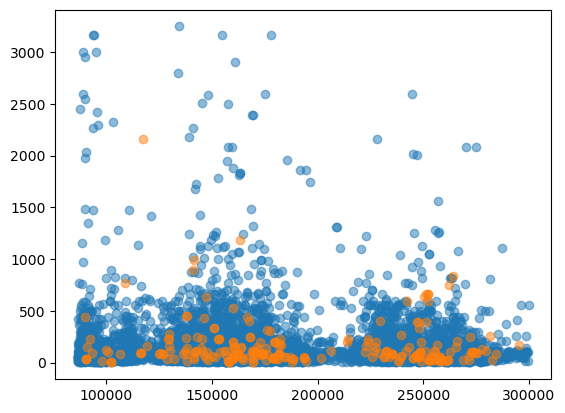

In [30]:
plt.scatter(train_df.loc[((train_df['isFraud']==0) & (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==0) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.scatter(train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionDT')],
            train_df.loc[((train_df['isFraud']==1) &  (train_df['TransactionDT']< 300000),'TransactionAmt')], alpha=0.5)
plt.show()

Видно, что суммы транзакций имеют периодических характер во времени. К-во мошейнеческих транзакций также менятес с тесчением времени вцелом повторя динамику обычных. 

Если судить по графику, суммы мошейнеческих транзакций в целом вдое ниже чем суммы оычных. 

так если большая часть транзакций прнимает значение чуть больше 1000 у.е. , то мошейнеческие транзакции соврешаются на сумму до 500 у.е. 

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.


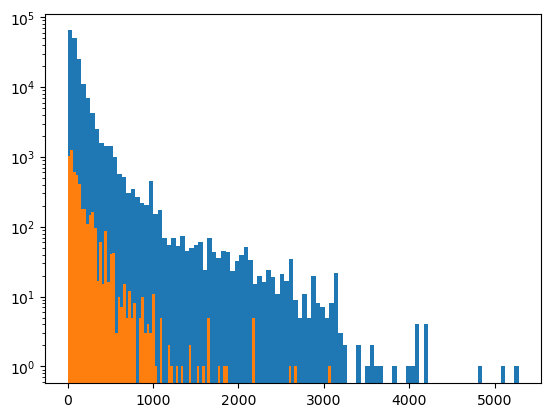

In [31]:
plt.hist(train_df.loc[(train_df['isFraud']==0, 'TransactionAmt') ], bins=100)
plt.hist(train_df.loc[(train_df['isFraud']==1, 'TransactionAmt') ], bins=100)
plt.yscale('log')
plt.show()

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.

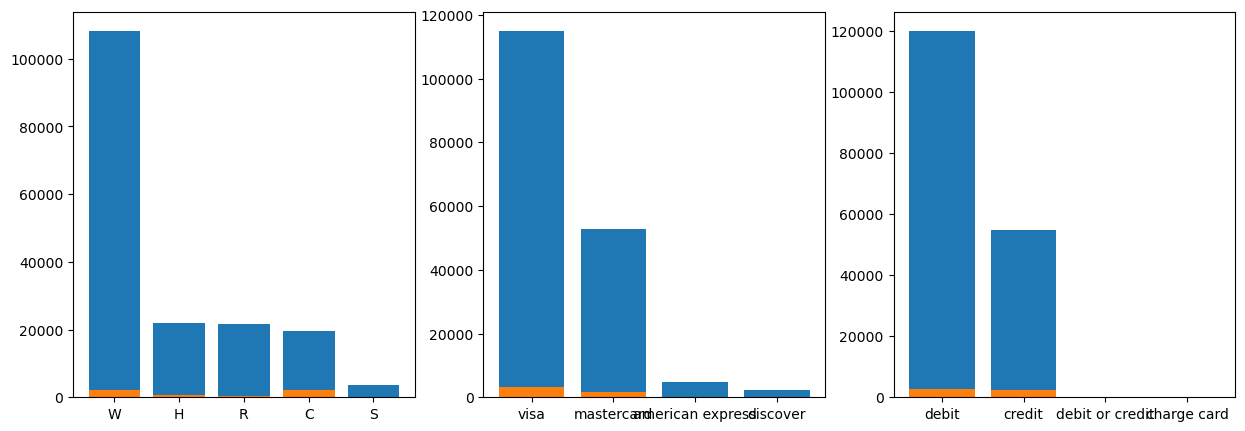

In [32]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==0, feature)].value_counts()
    ax[i].bar( values_list.index, values_list.values)
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

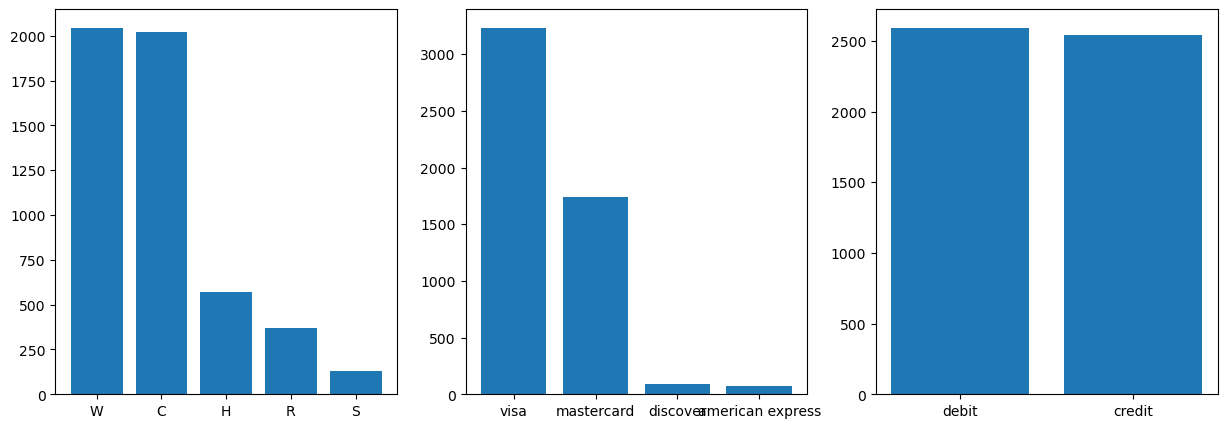

In [33]:
features = ['ProductCD', 'card4', 'card6']
fig, ax = plt.subplots(1,3, figsize=(15,5))

for i, feature in enumerate(features):
    values_list = train_df.loc[(train_df['isFraud']==1, feature)].value_counts()
    ax[i].bar(values_list.index, values_list.values)
plt.show()

**Задание 1:** отобрать только числовые признаки и обучить модель XGBoost с параметром booster = gbtree. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

In [35]:
y_data_train = train_df['isFraud']
x_data_train = train_df.drop(['isFraud'],axis=1)

y_data_test = test_df['isFraud']
x_data_test = test_df.drop(['isFraud'],axis=1)

In [36]:
# Получим список катероиальных и числовых признаков.

categorical = []
numerical = []
for col, value in x_data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)

In [37]:
x_data[categorical].head(5)

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,T,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,F,F,F,F
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# statistics_array = []
# fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# for num, feature in enumerate(features[idx]):
#     statistic, pvalue = ks_2samp(
#         train_df[feature].sample(500), test_df[feature].sample(500)
#     )
#     statistics_array.append(statistic)

#     sns.kdeplot(train_df[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
#     sns.kdeplot(train_df[feature], ax=axes[num//5, num%5], color="Green", label="Test")

#     axes[num//5, num%5].set_title(
#         (f"Kolmogorov-Smirnov test for train/test\n"
#         f"feature: {feature}, p-value: {round(statistic, 3)}")
#     )

In [38]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [39]:
x_train = x_data_train[numerical]
y_train = y_data_train


x_valid = x_data_test[numerical]
y_valid = y_data_test

In [40]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [41]:
params = {
    "booster": "gblinear",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [42]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

[18:04:14] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.60105	valid-auc:0.60345
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.71427	valid-auc:0.70604
[20]	train-auc:0.72993	valid-auc:0.71977
[30]	train-auc:0.73671	valid-auc:0.72473
[40]	train-auc:0.74026	valid-auc:0.72694
[50]	train-auc:0.74234	valid-auc:0.72801
[60]	train-auc:0.74371	valid-auc:0.72861
[70]	train-auc:0.74470	valid-auc:0.72903
[80]	train-auc:0.74547	valid-auc:0.72934
[90]	train-auc:0.74610	valid-auc:0.72959
[99]	train-auc:0.74660	valid-auc:0.72979


In [43]:
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=25,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=3,
)

[18:04:39] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:04:39] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:04:40] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification

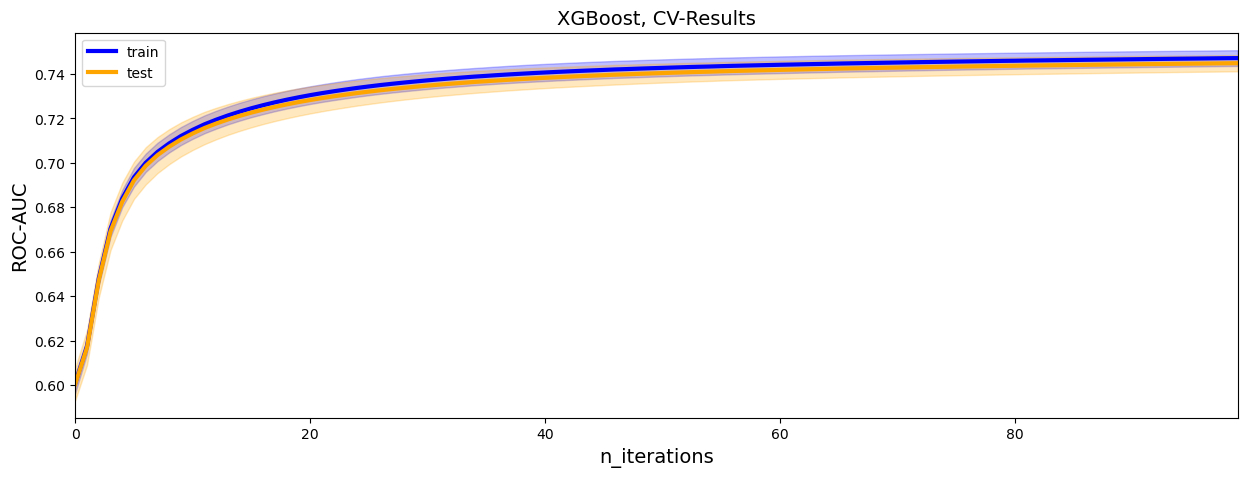

In [44]:
fig = plt.figure(figsize=(15, 5))
plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")

plt.fill_between(
    x=cv_result.index,
    y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
    y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
    alpha=0.25, color="blue"
)
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
    y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
    alpha=0.25, color="orange"
)

plt.title("XGBoost, CV-Results", size=14)
plt.xlabel("n_iterations", size=14)
plt.xlim(0, cv_result.index.max())
plt.ylabel("ROC-AUC", size=14)
plt.legend(loc="best")
plt.show()

In [47]:
model = xgb.XGBClassifier(**params)

cv_result=model.fit(
    X=x_train,
    y=y_train,
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    early_stopping_rounds=50,
    eval_metric="auc",
    verbose=10
)

[18:11:12] WARNING: ../src/learner.cc:516: 
Parameters: { gamma, max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.60199	validation_1-auc:0.60421
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[10]	validation_0-auc:0.71443	validation_1-auc:0.70614
[20]	validation_0-auc:0.72994	validation_1-auc:0.71978
[30]	validation_0-auc:0.73673	validation_1-auc:0.72475
[40]	validation_0-auc:0.74025	validation_1-auc:0.72691
[50]	validation_0-auc:0.74235	validation_1-auc:0.72803
[60]	validation_0-auc:0.74370	validation_1-auc:0.72860
[70]	validation_0-auc:0.74470	validation_1-auc:0.72902
[80]	validation_0-auc:0.74547	validation_1-auc:0.72933
[90]	validati

In [51]:
history

NameError: name 'history' is not defined

In [48]:
fig = plt.figure(figsize=(15, 5))
plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")

plt.fill_between(
    x=cv_result.index,
    y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
    y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
    alpha=0.25, color="blue"
)
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
    y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
    alpha=0.25, color="orange"
)

plt.title("XGBoost, CV-Results", size=14)
plt.xlabel("n_iterations", size=14)
plt.xlim(0, cv_result.index.max())
plt.ylabel("ROC-AUC", size=14)
plt.legend(loc="best")
plt.show()

TypeError: 'XGBClassifier' object is not subscriptable

In [ ]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)

dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [ ]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=10,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.


**Задание 2:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 1.

**Задание 4:** для числовых признаков обучить модель LightGBM. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 5:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 4.

**Задание 6:** обработать категориальные признаки встроенным методом в LightGBM. Выполнить задание 4. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 5.

**Задание 7:** для числовых признаков обучить модель CatBoost. Обучать алгоритм до тех пор, пока метрика качества не перестанет улучшаться на валидационной выборке в течение определенного числа итераций (выбрать значение самостоятельно).

**Задание 8:** обработать категориальные признаки любым способом (который вы знаете) и добавить их к данным. Выполнить задание 7.

**Задание 9:** обработать категориальные признаки встроенным методом в CatBoost. Выполнить задание 7. Сделать выводы о качестве работы алгоритма, по сравнению с пунктом 8.

**Задание 10:** построить ROC-кривую для всех построенных алгоритмов на обучающей и тестовой выборке. Сделать выводы о работе алгоритмов с точки зрения качества на тестовой выборке и с точки зрения переобучения.


## Задание на повторение:
Задание не обязательно к выполнению, но очень рекомендуется для понимания набора данных, этот набор данных будет использован и для следующего домашнего задания.

**Задание 1:** Построить график распределения времени совершения транзакции для обучающей / тестовой выборки, сделать выводы о том, как разбиты данные и какие виды валидации могут подойти для данной задачи.

**Задание 2:** построить scatter-plot зависимости суммы транзакции от времени совершения транзакции. Построить графики для обучающей выборки и для тестовой выборки, для обучающей выборки - построить как для целевой переменной = 0, так и для переменной = 1. Сделать выводы.

**Задание 3:** построить распределение признака TransactionAmt в логарифмическом масштабе, сделать выводы о близости распредления к нормальному распределению. Построить распределение признака в логарифмическому масштабе для обучающей выборк и для тестовой выборки, сделать выводы.

**Задание 4:** построить распределение признака целевой переменной в зависимости от значений категориальных признаков ProductCD, card4, card6. Сделать выводы.
